In [2]:
import os
from IPython.display import Image

## Setup

In [17]:
from roboflow import Roboflow

rf = Roboflow(api_key="k0c4LE0r8CKhp8vYiax6")
project = rf.workspace("gmnsprites").project("spritenet")
version = project.version(1)
dataset = version.download("yolov5", "./roboflow_datasets")

loading Roboflow workspace...
loading Roboflow project...


In [18]:
dataset_dir = os.path.join(dataset.location, dataset.name + "-" + dataset.version)
print(f"Dataset downloaded to {dataset_dir}")

Dataset downloaded to d:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow_datasets\SpriteNet-1


In [ ]:
project_name = "yolov5_results"

In [15]:
experiment_name = "spriteNetv1_pretrained_s"

## Train

In [19]:
!python yolov5/train.py --img 320 --batch -1 --epochs 100 --data {dataset_dir}/data.yaml --cfg models/custom_yolov5s.yaml --weights ''  --name {experiment_name} --cache ram --bbox_interval 3 --project {project_name}/train

      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  outputCPU times: total: 125 ms
Wall time: 7min 7s

     7022326       3.986         0.134         17.22         66.78        (1, 3, 320, 320)                    list
     7022326       7.973         0.176         12.36         24.86        (2, 3, 320, 320)                    list
     7022326       15.95         0.256         11.86         23.87        (4, 3, 320, 320)                    list
     7022326       31.89         0.428         12.61         22.95        (8, 3, 320, 320)                    list
     7022326       63.78         0.839         13.76         26.05       (16, 3, 320, 320)                    list



train: weights='', cfg=models/custom_yolov5s.yaml, data=d:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow_datasets\SpriteNet-1/data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=-1, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=spriteNetv1_pretrained_s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-363-gf44db010 Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (

## Results

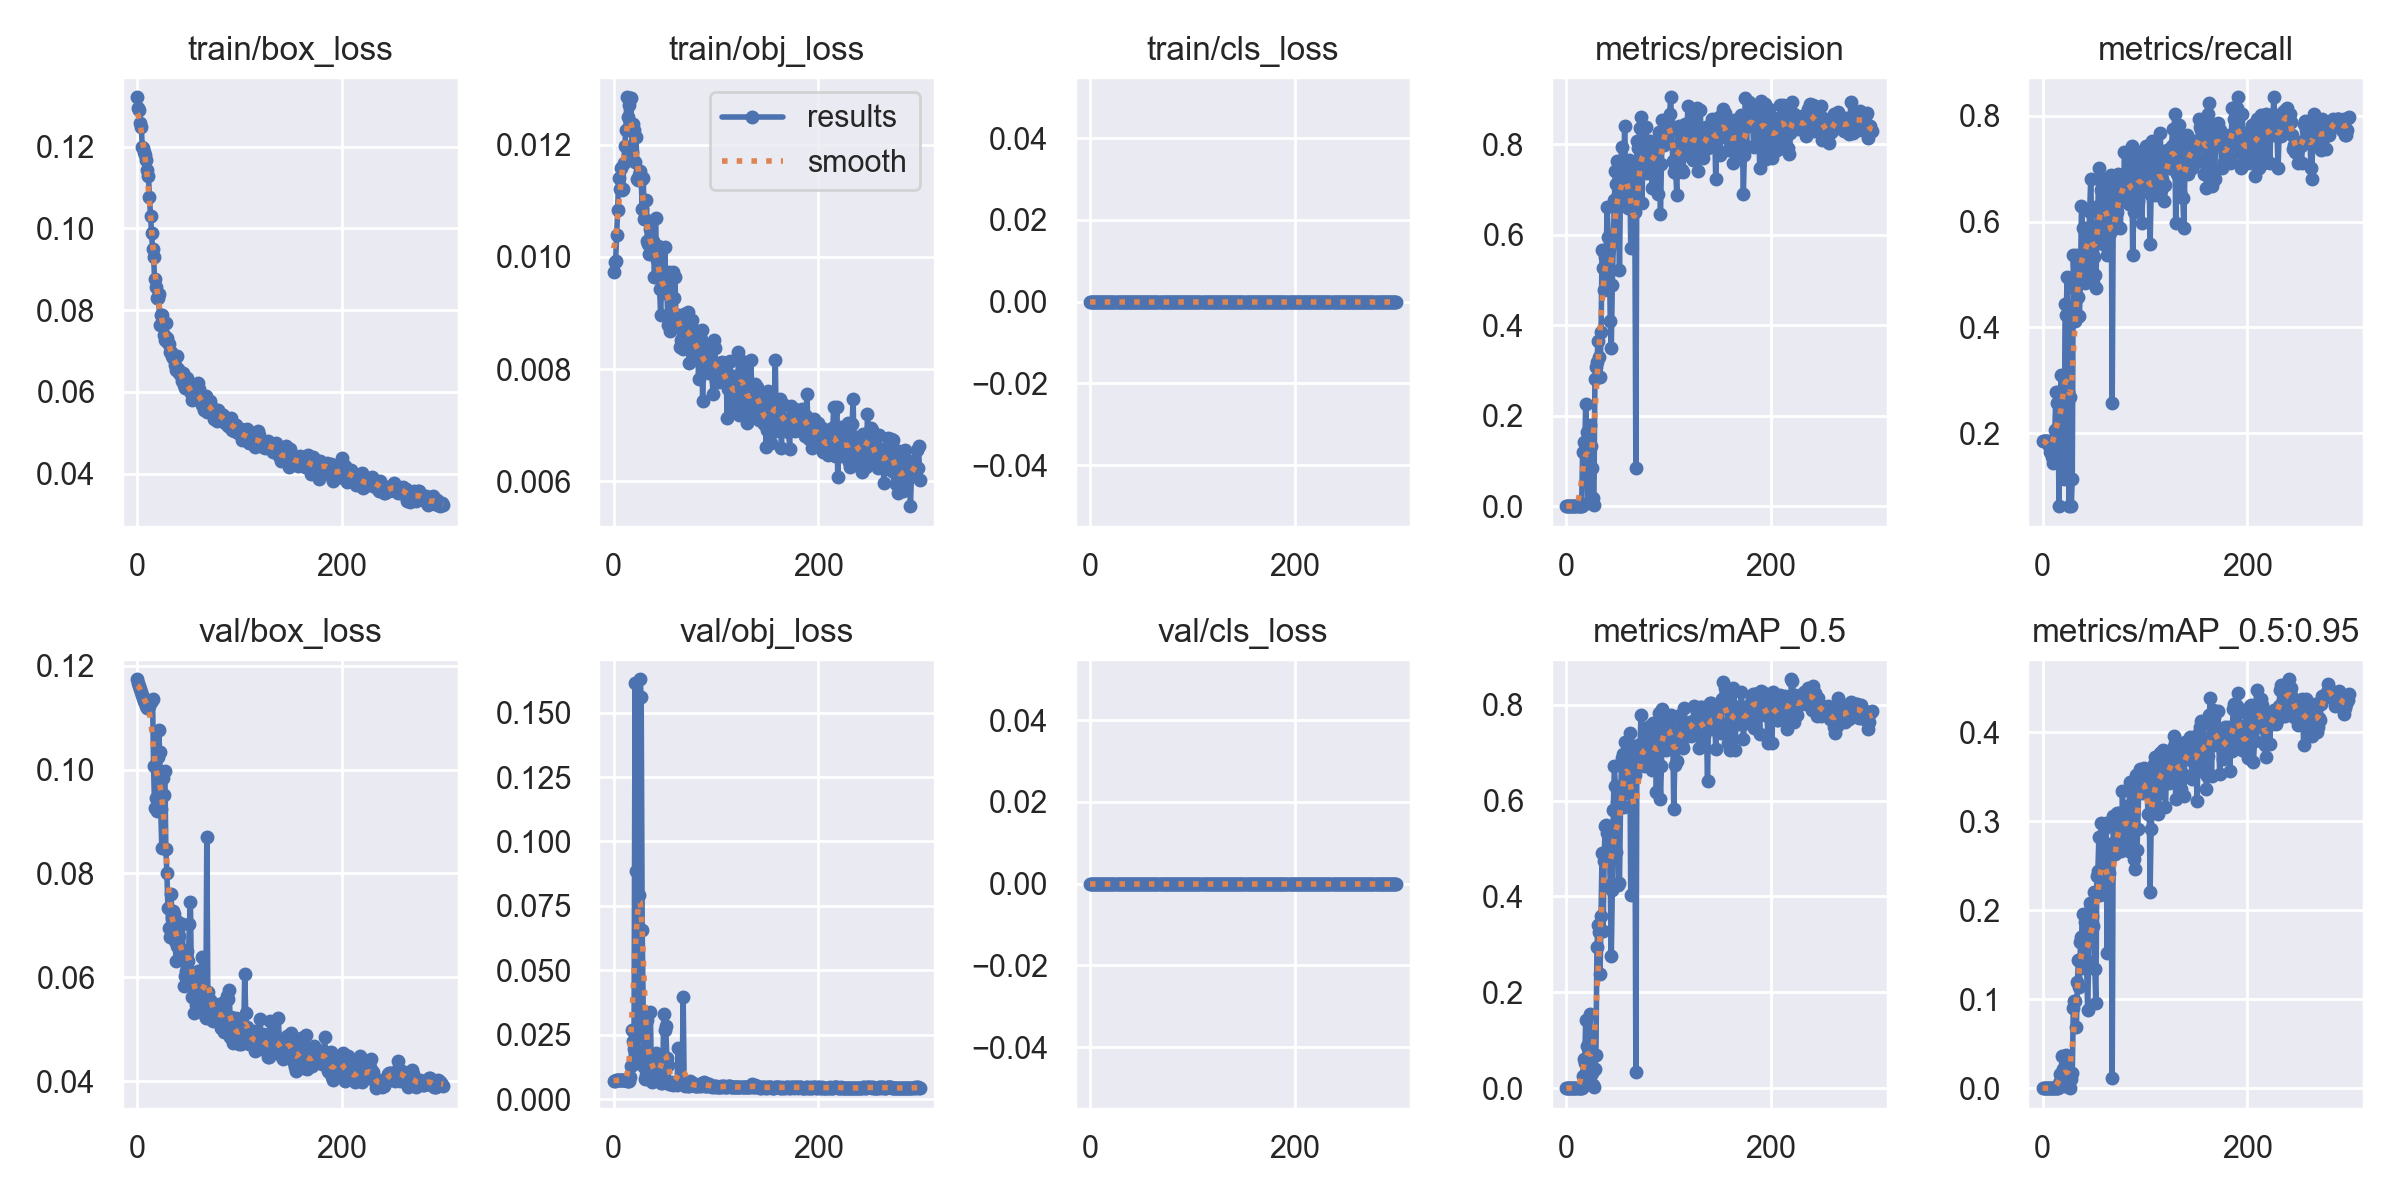

In [4]:
Image(filename=f"yolov5/runs/train/{experiment_name}/results.png", width=1000)

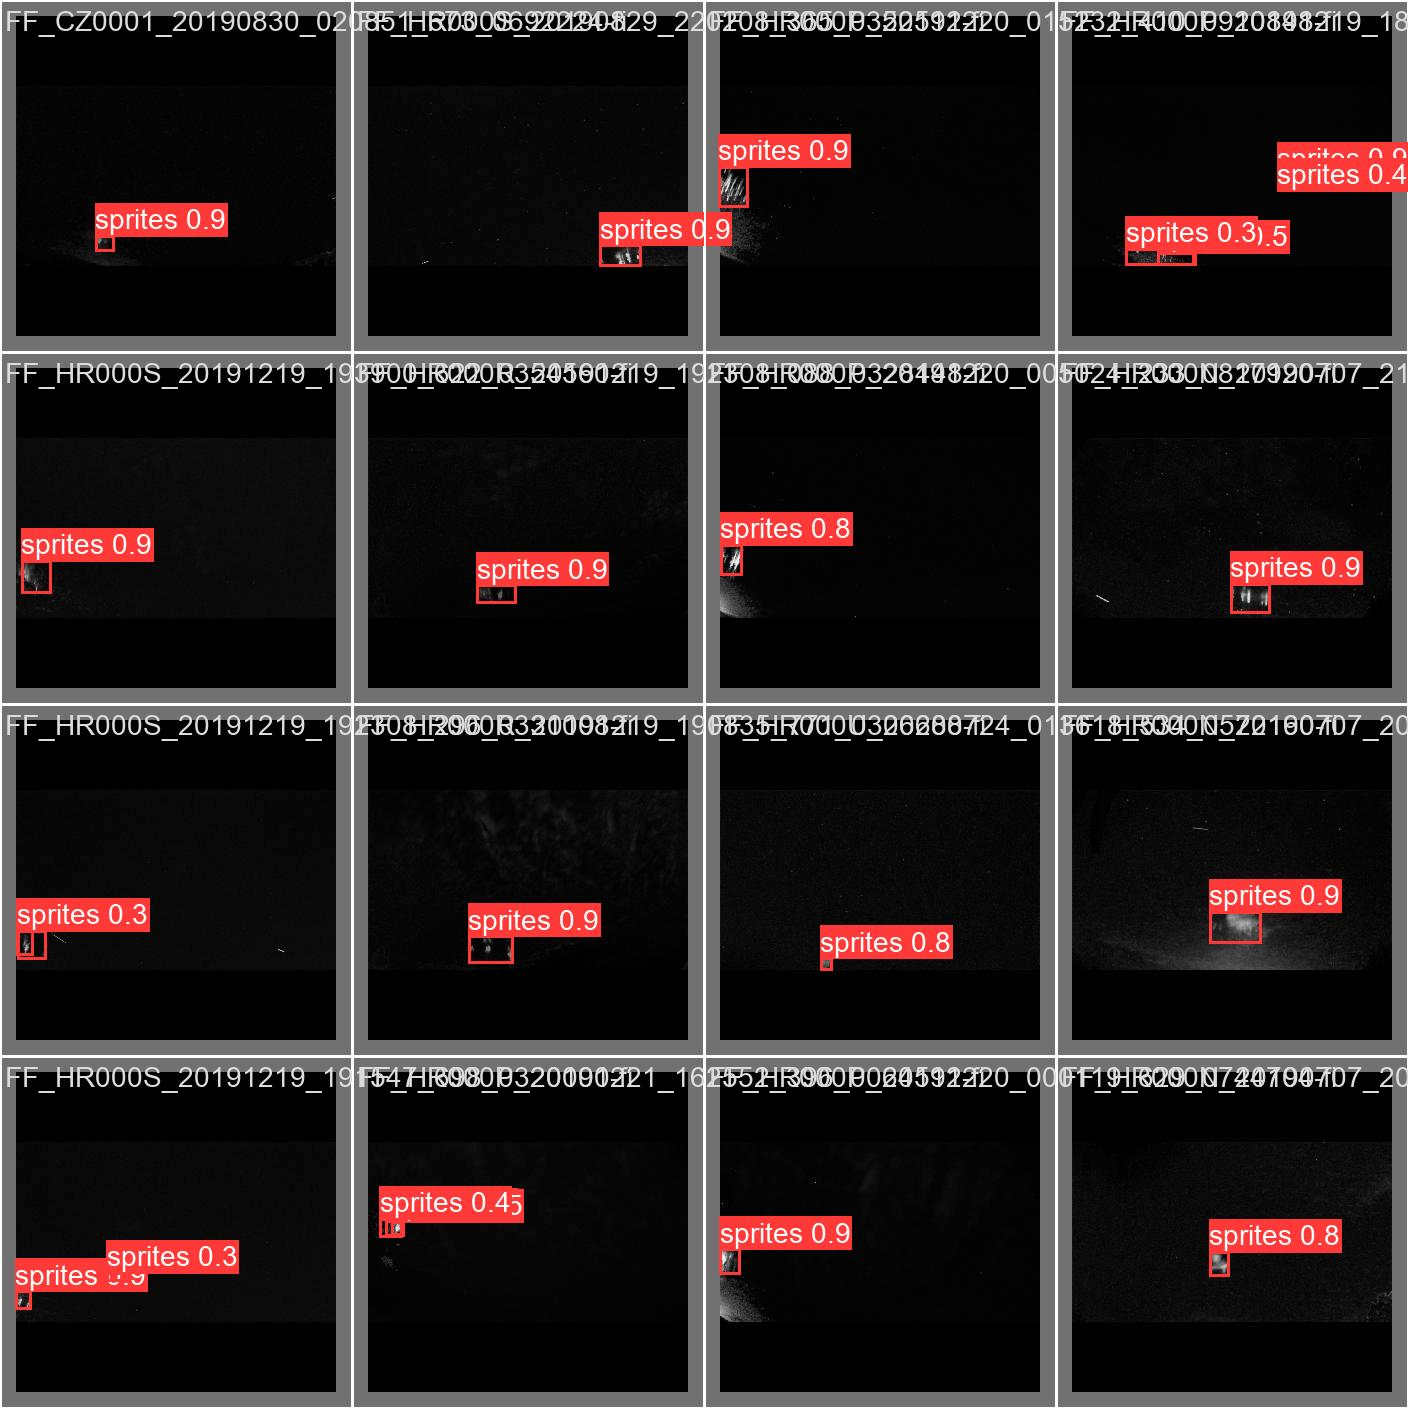

In [14]:
Image(filename=f"yolov5/runs/train/{experiment_name}/val_batch0_pred.jpg", width=900)

## Validation

In [ ]:
!python yolov5/val.py --project {project_name} --name {experiment_name} --weights {project_name}/train/{experiment_name}/weights/best.pt --data {dataset_dir}/data.yaml --imgsz 320 --conf-thres 0.1 --iou_thres 0.1 --max-det 4

## Test

In [9]:
!python yolov5/detect.py --weights yolov5/runs/train/{experiment_name}/weights/best.pt --img 320 --conf 0.1 --source {dataset_dir}/test/images --name {experiment_name} --max-det 4 --iou-thres 0.1 --view-img --project {project_name}/detect

detect: weights=['runs/train/spriteNetv1/weights/best.pt'], source=d:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow_datasets\SpriteNet-1/test/images, data=data\coco128.yaml, imgsz=[320, 320], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-363-gf44db010 Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/51 D:\Documents\Astronomija\GMN\dev\SpriteNet\roboflow_datasets\SpriteNet-1\test\images\FF_CZ0001_20200520_014715_235_0403712-fits_png.rf.f858af58bf6ac68f5266dc17fe8c4af1.jpg: 320x320 (no detections), 5.5ms
ima

In [8]:
import glob
from IPython.display import Image, display, HTML

# Get the list of image files
image_files = glob.glob("yolov5/runs/detect/exp2/*.jpg")[:10]  # assuming JPG

# Create HTML to display images in 2 columns
html = "<table><tr>"

for i, imageName in enumerate(image_files):
    if i % 3 == 0 and i != 0:
        html += "</tr><tr>"
    html += f"<td><img src='{imageName}' style='width: 100%;'></td>"

html += "</tr></table>"

# Display the HTML
display(HTML(html))

## Export

`--half --device 0` is used to export models at FP16 half precision for smaller file sizes

In [13]:
!python yolov5/export.py --weights yolov5/runs/train/{experiment_name}/weights/best.pt --include tflite --imgsz 320,320

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(1, 640, 640, 3)]           0         []                            
                                                                                                  
 tf_conv (TFConv)            (1, 320, 320, 32)            3488      ['input_1[0][0]']             
                                                                                                  
 tf_conv_1 (TFConv)          (1, 160, 160, 64)            18496     ['tf_conv[0][0]']             
                                                                                                  
 tfc3 (TFC3)                 (1, 160, 160, 64)            18624     ['tf_conv_1[0][0]']           
                                                                                              

d:\Documents\Astronomija\GMN\dev\SpriteNet\yolov5\export.py:59: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
export: data=D:\Documents\Astronomija\GMN\dev\SpriteNet\yolov5\data\coco128.yaml, weights=['yolov5/runs/train/spriteNetv1/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=0, half=True, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5  v7.0-363-gf44db010